In [1]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1tVDZ3OLoxr_APkVcYrXn8fJxFDr3_k2k?usp=sharing)

# **Week 7 - Introduction to Gradient Descent**

## **Abstract**

1. **Understanding Gradient Descent**: Gradient descent is an optimization algorithm used to minimize a function by iteratively moving in the direction of the steepest descent as defined by the negative of the gradient. It's widely used in machine learning for efficiently finding the optimal parameters of models.

2. **Introduction to the Jacobian**: The Jacobian matrix is a key concept in multivariable calculus, representing all first-order partial derivatives of a vector-valued function. It provides crucial insights into how changes in input variables affect the output, making it vital for understanding the dynamics of complex systems.


3. **Fitting the Gradient Descent to N-N**: Applying Gradient Descent with a Harmonic Series to fit a Potential Energy Surface (PES) to N-N using PyTorch.



>### **References: Essential Resources for Further Learning**
>
>- **PyTorch**: [Official Documentation](https://pytorch.org/docs/stable/index.html)
>- **A Gentle Introduction to the Jacobian**: [Online Course](https://machinelearningmastery.com/a-gentle-introduction-to-the-jacobian/)
>- **A tutorial on Gaussian process regression: Modelling, exploring, and exploiting unknown functions**: [Journal Article](https://www.biorxiv.org/content/10.1101/095190v3)
>- **Gradient fit functions for two-body potential energy surfaces based upon a harmonic series**: [Research Paper](https://www.tandfonline.com/doi/full/10.1080/08927020903433739)



Feel free to explore these resources to deepen your understanding of data visualization, data management, and computational tools in Chemistry.





## **Linear Model Overview**

The linear model, a fundamental concept in machine learning, can be dissected as follows:

- **Linear Model Representation**:
  - The model is defined as $f_{\phi(\cdot)}(\mathbf{x}) = \mathbf{w}^\top \phi(\mathbf{x}) = \sum_i w_i \phi_i(\mathbf{x})$.
  - Here, $\phi(\cdot)$ represents a linear map to a new **feature representation** (e.g., polynomials, Fourier basis).

- **Square Loss Function**:
  - Denoted by ${L} \approx \|\mathbf{y} - f_{\phi(\cdot)}(\mathbf{X}) \|_2$.
  - It measures the Euclidean distance between the model's predictions and the actual target values.

- **Optimal Parameters ($\mathbf{w}^*$)**:
  - Obtained in **closed form** as $\mathbf{w}^* = \Big( \Phi(\mathbf{X})^\top\Phi(\mathbf{X})\Big)^{-1} \Phi(\mathbf{X})^\top\mathbf{y}$.
  - This solution requires **matrix inversion**, an operation with computational complexity ${O}(N^3)$.

- **Computational Challenge**:
  - Inverting the matrix $\Big( \Phi(\mathbf{X})^\top\Phi(\mathbf{X})\Big)$ is the bottleneck due to its high computational cost.
  - With a large dataset (e.g., $N \approx 100,000$), this becomes significantly demanding.

- **Gradient of Loss Function**:
  - Expressed as $\nabla {L}(\mathbf{w}) = \Phi(\mathbf{X})^\top\Phi(\mathbf{X})\mathbf{w} -\Phi(\mathbf{X})^\top\mathbf{y}$.
  - Notably, the computational complexity here scales **quadratically** (${O}(N^2)$), which is more efficient than matrix inversion.

- **Scaling Perspective**:
  - For a dataset with $N = 100$, the quadratic and cubic scalings result in $N^2 = 10,000$ and $N^3 = 1,000,000$, respectively.

The above breakdown showcases the linear model's structure and highlights the computational challenges, especially with large datasets. Understanding these aspects is crucial for selecting appropriate models and optimization strategies in machine learning.

<br>

> A closed-form solution is an exact solution expressed as a straightforward expression. For example, in the case of linear regression, the optimal weights $\mathbf{w}^*$ can be found directly using the formula:

### **'The Kernel Trick'**

- **Dimensionality Transformation for Extrapolation**: The transformation of input space to a feature space via a **kernel function $\phi$** is especially beneficial in extrapolation tasks.
  - **Enhanced Pattern Recognition**: In the feature space, the model can recognize complex patterns and trends that are not apparent in the original input space. This improved pattern recognition is crucial for making predictions beyond the range of observed data.
  - **Linear Separability in Feature Space**: While the original input space might display non-linear relationships, the feature space is often linearly separable. This property allows the model to extrapolate more effectively, as linear relationships are easier to extend beyond the known data.
  - **Implicit High-Dimensional Mapping**: The kernel trick enables this transformation without the computational expense of directly calculating high-dimensional representations, which is instrumental for the model to make accurate extrapolations.

<br>

<table>
  <tr>
    <td style="text-align: center;">
      <img src="https://images.squarespace-cdn.com/content/v1/51af568be4b0b9ab836e2474/1444337178607-L2CH88QNWQ7M7KIB907P/2d_boundary.png?format=1000w" alt="2D Boundary" height="400"/>
      <br>2D view of boundary
    </td>
    <td style="text-align: center;">
      <img src="https://images.squarespace-cdn.com/content/v1/51af568be4b0b9ab836e2474/1444337191389-5TTD0VOCK8R2QSHTRGJ2/boundary.gif" alt="Boundary GIF" height="400"/>
      <br>3D view of boundary plane
    </td>
  </tr>
</table>


[**Figure 1 - The "Kernel Trick" Visualized. Image by Ilan Man**](https://www.ilanman.io/blog/2015/10/9/not-your-grandfathers-kernel-trick)


> **Transformation Function** **$\phi$**: Represents the kernel trick, an implicit function that transformes the data to a higher dimension. In higher dimensions, the data can be segmented into groups more efficiently.



## **Gradient Descent: An Introduction in the Context of Linear Models**

Gradient descent is an optimization technique in machine learning, especially useful when dealing with complex models where closed-form solutions, like those in simpler linear models, are not feasible. As we've seen in the context of linear models, the concept of gradients plays a crucial role in understanding and optimizing the model's performance.

### **Understanding Gradient Descent:**

- **Basic Principle**: Gradient descent is an iterative method used to find the **minimum or maximum** of a function. This method is particularly effective for functions where calculating the exact minimum is not straightforward or computationally feasible.

- **Application in Linear Models**: Recall from our discussion on linear models, the gradient of the loss function $L$ with respect to the weights $\mathbf{w}$ was given by $\nabla L(\mathbf{w}) = \Phi(\mathbf{X})^\top\Phi(\mathbf{X})\mathbf{w} - \Phi(\mathbf{X})^\top\mathbf{y}$. In cases where this cannot be minimized directly through a closed-form solution, gradient descent becomes invaluable.

- **Mechanism**: In gradient descent, we start with an initial guess for the minimizing parameters (e.g., the weights in a linear model) and iteratively adjust these parameters in the direction that reduces the loss function. The direction is determined by the gradient of the function at that point.





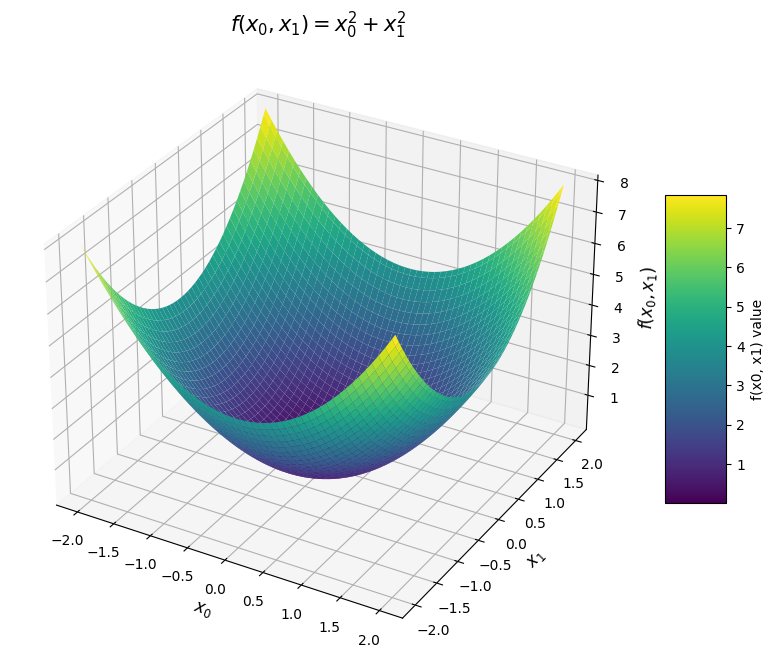

In [2]:
# Function to compute the sum of squares
f_sqr = lambda x: np.sum(np.power(x, 2), axis=1)

# Generating the grid
x = np.linspace(-2., 2., 100)
x0, x1 = np.meshgrid(x, x)
X = np.column_stack((x0.flatten(), x1.flatten()))

# Compute function values
y = f_sqr(X)
y = y.reshape((x0.shape))

# 3D surface plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x0, x1, y, cmap='viridis', edgecolor='none')

# Adding a color bar
fig.colorbar(surf, shrink=0.5, aspect=5, label='f(x0, x1) value')

# Setting labels and title
ax.set_xlabel('$x_0$', fontsize=12)
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_zlabel('$f(x_0, x_1)$', fontsize=12)
ax.set_title('$f(x_0, x_1) = x_0^2 + x_1^2$', fontsize=15)

plt.show()


### **Gradient Descent in Action:**

- **Simple Example**: Consider a function $f(x_0,x_1) = x_0^2 + x_1^2$. This function represents a simple quadratic bowl with its minimum at $(x_0, x_1) = (0, 0)$.

- **Gradient Computation**: The gradient of this function is $\nabla f(x_0, x_1) = [2x_0, 2x_1]$. This gradient points in the direction of the steepest ascent of the function.

- **Iterative Process**: Starting from an initial point, say $(x_0, x_1) = (1, 1)$, gradient descent will use the gradient at this point to determine the direction to move in order to minimize $f$. By repeatedly taking steps opposite to the gradient, the algorithm converges to the minimum of the function.

<br>

<a href="https://github.com/rudra-sondhi/Machine-Learning-Animations" target="_blank">
  <img src="https://raw.githubusercontent.com/rudra-sondhi/Machine-Learning-Animations/main/Gradient%20Descent/Animations/gradient_descent_simple.gif" alt="Illustrating Gradient Descent" width="750">
</a>
<br>
</a>


[**Figure 2 - Illustrating Gradient Descent.**](https://github.com/rudra-sondhi/Machine-Learning-Animations/blob/main/Gradient%20Descent/Animations/gradient_descent_simple.gif)



### **Advantages and Limitations:**

- **Flexibility**: Gradient descent is versatile and can be applied to a wide range of functions, not just simple quadratic ones.

- **Computational Efficiency**: For very large datasets or complex models, gradient descent provides a practical way to approximate the optimal solution with reasonable computational resources.

- **Sensitivity to Initial Conditions and Learning Rate**: The starting point and the size of the steps (learning rate) can significantly affect the convergence and outcome of the algorithm.


<br>

<a href="https://github.com/rudra-sondhi/Machine-Learning-Animations" target="_blank">
  <img src="https://raw.githubusercontent.com/rudra-sondhi/Machine-Learning-Animations/main/Gradient%20Descent/Animations/gradient_descent_animation.gif" alt="Varied Initial Conditions for Gradient Descent" width="750">
</a>
<br>
</a>


[**Figure 3 - Varied Initial Conditions for Gradient Descent.**](https://github.com/rudra-sondhi/Machine-Learning-Animations/blob/main/Gradient%20Descent/Animations/gradient_descent_animation.gif)


<br>

> Notice the initial conditions and how the learning rate varied till convergence.

## **Introduction to the Jacobian**

In the context of the function $f(x_0, x_1) = x_0^2 + x_1^2$, the Jacobian plays a crucial role in understanding how changes in the input variables ($x_0$ and $x_1$) affect changes in the output of the function. The Jacobian is a matrix that consists of all the first-order partial derivatives of a vector-valued function. For a scalar function like $f(x_0, x_1)$, the Jacobian reduces to the gradient of the function.

Here's a brief overview of its application:

- **Function Description**: The given function $f(x_0, x_1) = x_0^2 + x_1^2$ is a simple quadratic function, representing a paraboloid in a two-dimensional space.

- **Jacobian Calculation**: For this function, the Jacobian (or the gradient, in this case) is a vector containing the partial derivatives with respect to each variable:
  
  $$
  \nabla f = \begin{bmatrix}
              \frac{\partial f}{\partial x_0} \\
              \frac{\partial f}{\partial x_1}
            \end{bmatrix}
          = \begin{bmatrix}
              2x_0 \\
              2x_1
            \end{bmatrix}
  $$

- **Application**: The Jacobian (gradient) indicates the direction of the steepest ascent in the function's output. In optimization, particularly in gradient descent, this information is used to iteratively move towards the minimum of the function. Since $f(x_0, x_1)$ is convex, following the negative of the gradient will lead to the global minimum.

> In simpler terms, the Jacobian can be considered as the **"first derivative"** for functions defined by matrices.

<!DOCTYPE html>
<html>
<head>
    <style>
        .centered-image {
            display: block;
            margin-left: auto;
            margin-right: auto;
            width: 50%;
        }
    </style>
</head>
<body>

<a href="https://github.com/rudra-sondhi/Machine-Learning-Animations" target="_blank">
    <img src="https://raw.githubusercontent.com/rudra-sondhi/Machine-Learning-Animations/main/Gradient%20Descent/Animations/gradient_descent_side_by_side_animation.gif"
         alt="Varied Initial Conditions for Gradient Descent"
         class="centered-image">
</a>

<br>
<figcaption align = "center"><b>Figure 4 - Varied Initial Conditions for Gradient Descent.</b></figcaption>

</body>
</html>


## **Gradient Descent for Minimum Search**

Gradient descent is a fundamental algorithm for finding the minimum of a function, such as $f(x_0, x_1) = x_0^2 + x_1^2$. Here's a concise overview of the process:

1. **Initialization**: Begin with random values of $x_0$ and $x_1$, denoted as $[x_0,x_1]_{t}$.

2. **Gradient Computation**: Calculate the gradient, $\nabla f(x_0,x_1) = \nabla f([x_0,x_1]_{t})$, which points in the direction of the steepest ascent.

3. **Update Step**:
   - Adjust $x_0$ and $x_1$ using the gradient: $[x_0,x_1]_{t+1} = [x_0,x_1]_t - \eta \nabla f(x_0,x_1)$.
   - The parameter $\eta$ is the **learning rate**, controlling the size of each update.

4. **Convergence Check**:
   - Continue steps 2 and 3 until the gradient is sufficiently small ($\|\nabla f(x_0,x_1) \| < 10^{-6}$) or the change in function value between iterations is below a threshold ($\| f([x_0,x_1]_{t+1}) - f([x_0,x_1]_{t})\| < 10^{-6}$).
   - The value $10^{-6}$ is an example threshold and can be adjusted based on the specific problem.



In [3]:
# Define the gradient and function for gradient descent
def grad_f_sqr(x):
    # Placeholder gradient function
    return 2 * x

f_sqr = lambda x: np.sum(np.power(x, 2), axis=1)

# Gradient Descent Algorithm

# Initializing variables
x = np.random.uniform(-2., 2., (1, 2))
eta = 0.1

# Preparing trajectory storage
x_trajectory = np.zeros_like(x.ravel())
g_trajectory = np.zeros_like(x.ravel())
f_trajectory = np.zeros(1)
c = 1E-4
xt = x

# Gradient Descent Iteration
for t in range(20):
    grad_t = grad_f_sqr(xt)
    y_t = np.sum(xt ** 2)
    g_trajectory = np.vstack((g_trajectory, grad_t))
    f_trajectory = np.append(f_trajectory, y_t)
    x_trajectory = np.vstack((x_trajectory, xt))

    # Improved print formatting using f-string
    print(f't = {t}, f = {y_t:.4f}, x = {xt}, g = {grad_t}')

    xt = xt - eta * grad_t

    # Break condition based on gradient and function value change
    if np.linalg.norm(g_trajectory[-2] - g_trajectory[-1]) < c or np.linalg.norm(f_trajectory[-2] - f_trajectory[-1]) < c:
        break

# Data Preparation for Plotting
# Remove initial placeholder points
g_trajectory = g_trajectory[1:]
f_trajectory = f_trajectory[1:]
x_trajectory = x_trajectory[1:]

# Using predefined values for the contour plot
x = np.linspace(-2., 2., 50)
x0, x1 = np.meshgrid(x, x)
X = np.column_stack((x0.flatten(), x1.flatten()))
y = f_sqr(X)
y = y.reshape((x0.shape))

t = 0, f = 2.9411, x = [[-0.45158572 -1.65443449]], g = [[-0.90317143 -3.30886897]]
t = 1, f = 1.8823, x = [[-0.36126857 -1.32354759]], g = [[-0.72253715 -2.64709518]]
t = 2, f = 1.2047, x = [[-0.28901486 -1.05883807]], g = [[-0.57802972 -2.11767614]]
t = 3, f = 0.7710, x = [[-0.23121189 -0.84707046]], g = [[-0.46242377 -1.69414091]]
t = 4, f = 0.4934, x = [[-0.18496951 -0.67765637]], g = [[-0.36993902 -1.35531273]]
t = 5, f = 0.3158, x = [[-0.14797561 -0.54212509]], g = [[-0.29595121 -1.08425018]]
t = 6, f = 0.2021, x = [[-0.11838049 -0.43370007]], g = [[-0.23676097 -0.86740015]]
t = 7, f = 0.1294, x = [[-0.09470439 -0.34696006]], g = [[-0.18940878 -0.69392012]]
t = 8, f = 0.0828, x = [[-0.07576351 -0.27756805]], g = [[-0.15152702 -0.55513609]]
t = 9, f = 0.0530, x = [[-0.06061081 -0.22205444]], g = [[-0.12122162 -0.44410888]]
t = 10, f = 0.0339, x = [[-0.04848865 -0.17764355]], g = [[-0.09697729 -0.3552871 ]]
t = 11, f = 0.0217, x = [[-0.03879092 -0.14211484]], g = [[-0.07758184 -0.2

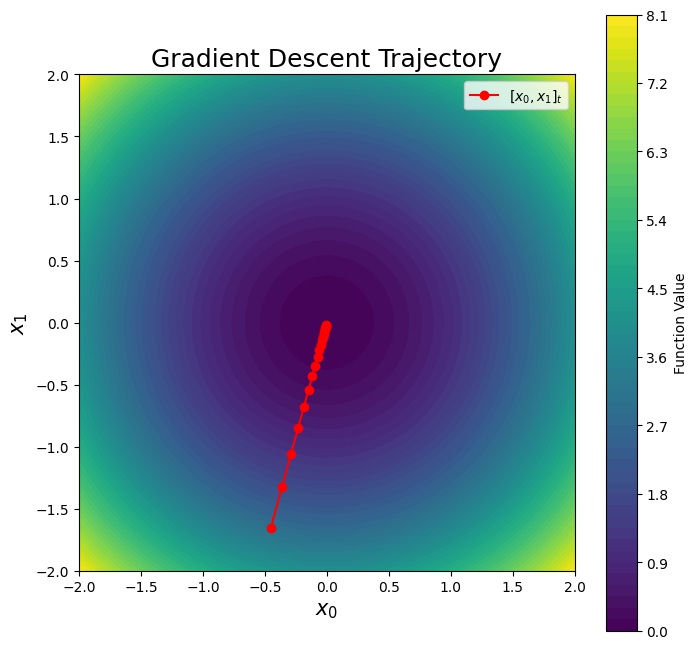

<Figure size 1000x800 with 0 Axes>

In [4]:
# Plotting
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')

# Contour plot with colormap and colorbar
contour = ax.contourf(x0, x1, y, levels=60, cmap='viridis')
plt.colorbar(contour, ax=ax, label='Function Value')

# Trajectory plot
ax.plot(x_trajectory[:, 0], x_trajectory[:, 1], color='red', marker='o', linestyle='-', label=r'$[x_0, x_1]_t$')

# Labels and Title
plt.figure(figsize=(10, 8))
ax.set_xlabel(r'$x_0$', fontsize=15)
ax.set_ylabel(r'$x_1$', fontsize=15)
ax.set_title('Gradient Descent Trajectory', fontsize=18)

# Legend
ax.legend()

plt.show()

## **Implementing a Linear Model in Torch for Harmonic Series**

The harmonic series can be employed to approximate the Morse function, providing an alternative approach with certain advantages. Here's a brief overview before coding it in Torch:

- **Morse Function**:
  - Represented as $E_{Morse} = D_{e}\left (1-\exp^{-\alpha(r-r_0)} \right )^2$.
  - Here, $\alpha = \sqrt{k/2D_{e}}$, with $D_e$, $r$, and $r_0$ being specific parameters of the system.

- **Harmonic Series**:
  - Expressed as $E_{harmonic} = \sum_{\ell=1}^p \frac{k_\ell}{r^{\ell}}$.
  - Unlike polynomials, it approaches zero as $r \to \infty$, making it suitable for certain types of approximations.
  - In this context, it is essentially a linear model over the terms $[r, r^1, \cdots, r^\ell]$.

- **Linear Model in Torch**:
  - In PyTorch, $E_{harmonic}$ can be represented as a linear model, where $k_\ell$ are the linear weights.
  - The model will be constructed using a series of powers of $r$ as features, and the weights will be learned to best approximate the Morse function.

The implementation in Torch involves defining the model structure, setting up the loss function and optimizer, and then training the model to learn the weights $k_\ell$. This approach demonstrates the versatility of linear models and the power of PyTorch in modeling complex functions.

<!DOCTYPE html>
<html>
<head>
    <style>
        .centered-image {
            display: block;
            margin-left: auto;
            margin-right: auto;
            width: 50%;
        }
    </style>
</head>
<body>

<a href="https://www-sop.inria.fr/members/Mathijs.Wintraecken/Mathematica.html" target="_blank">
    <img src="https://www-sop.inria.fr/members/Mathijs.Wintraecken/Mathematica/MorseDecompositionF4.gif"
         alt="An animated explanation of Morse theory"
         class="centered-image">
</a>

<br>
<figcaption align = "center"><b>Figure 5 - An animated explanation of Morse theory. Animation by Mathijs Wintraecken.</b></figcaption>

</body>
</html>

> Learn more about the [**Morse function**](https://www.tandfonline.com/doi/full/10.1080/08927020903433739). This paper discusses the use of Gradient fit functions for potential energy surfaces using a harmonic series.

In [5]:
# Define the Harmonic Series class
class HarmonicSeries(nn.Module):
    def __init__(self, ell):
        super().__init__()
        self.ell = ell

    def forward(self, x):
        x = torch.div(1, x)
        R = x
        for i in range(2, self.ell + 1):
            r_l = x.pow(i)
            R = torch.column_stack((R, r_l))
        # Ensure that R has self.ell columns
        return R[:, :self.ell]

In [6]:
# Define the Linear Harmonic Model class
class LinearHarmonicModel(nn.Module):
    def __init__(self, ell):
        super().__init__()
        self.ell = ell
        self.harmonic = HarmonicSeries(self.ell)
        self.linear = nn.Linear(self.ell, 1)
        nn.init.zeros_(self.linear.weight)  # Initialize weights to zeros

    def forward(self, x):
        r = self.harmonic(x)
        y = self.linear(r)
        return y

## **Fitting the PES for N2 (again)**

In [7]:
# Load and prepare data
data_url = "https://github.com/RodrigoAVargasHdz/CHEM-4PB3/raw/main/Course_Notes/data/PES_N2"
data = pd.read_csv(data_url)
X, y = data['R'].to_numpy(), data['Energy'].to_numpy()
X = torch.from_numpy(X).unsqueeze(1).float()
y = (y - np.mean(y)) / np.std(y)
y = torch.from_numpy(y).unsqueeze(1).float()

print("Shape X -> ", X.shape)
print("Len X -> ", len(X))

print("Shape Y -> ", y.shape)
print("Len Y -> ", len(y))

Shape X ->  torch.Size([100, 1])
Len X ->  100
Shape Y ->  torch.Size([100, 1])
Len Y ->  100


> Let's test our model before we starting fitting it.

Loss: tensor(1.0715, grad_fn=<MseLossBackward0>)
Parameters:
  Weight: Parameter containing:
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], requires_grad=True)
  Bias: Parameter containing:
tensor([0.2674], requires_grad=True)


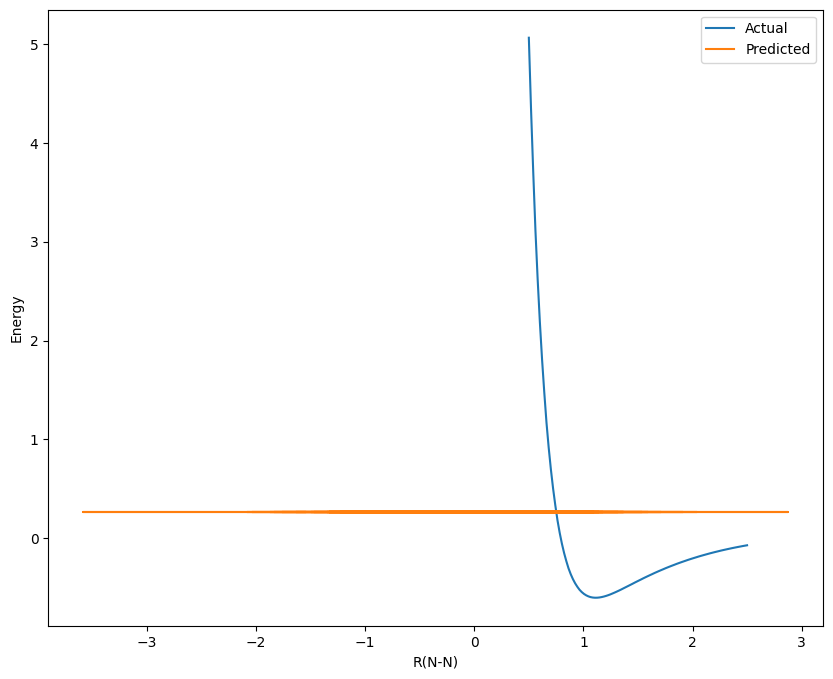

In [8]:
# Test our model
model_test = LinearHarmonicModel(10)
X_test = torch.randn((100, 1))
y_pred_test = model_test(X_test)
loss_test = nn.MSELoss()



print("Loss:" ,loss_test(y_pred_test,y))
print("Parameters:")
print(f"  Weight: {model_test.linear.weight}")
print(f"  Bias: {model_test.linear.bias}")

# Plotting
plt.figure(figsize=(10, 8))
plt.plot(X.numpy(), y.numpy(), label='Actual')
plt.plot(X_test.numpy(), model_test(X_test).detach().numpy(), label='Predicted')
plt.xlabel('R(N-N)')
plt.ylabel('Energy')
plt.legend()


plt.show()

In [9]:
# Initialize the model with the correct number of features
ell_value = 10
model = LinearHarmonicModel(ell_value)  # Set ell to match the number of input features

# Define loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [10]:
# Training loop
training_iter = 2000
loss_trajectory = []

l2_lambda = 0.1
for itr in range(1, training_iter):
    optimizer.zero_grad()  # Clear gradients at the start of each iteration

    output = model(X)  # Use the actual data for training
    loss_val = loss_fn(output, y)

    # Regularization term (L1 norm)
    l_norm = sum(p.abs().sum() for p in model.parameters())
    loss_val += l2_lambda * l_norm

    loss_val.backward()  # Perform backpropagation
    optimizer.step()  # Update model parameters

    if itr % 10 == 0:
        print(f'Iteration = {itr}, Loss = {loss_val.item()}')

    # Optionally, you can store the loss for later analysis
    loss_trajectory.append(loss_val.item())

Iteration = 10, Loss = 1.0814467668533325
Iteration = 20, Loss = 0.35184991359710693
Iteration = 30, Loss = 0.14048385620117188
Iteration = 40, Loss = 0.10440763831138611
Iteration = 50, Loss = 0.11324913054704666
Iteration = 60, Loss = 0.09235319495201111
Iteration = 70, Loss = 0.09170952439308167
Iteration = 80, Loss = 0.08880236744880676
Iteration = 90, Loss = 0.08719667792320251
Iteration = 100, Loss = 0.08615461736917496
Iteration = 110, Loss = 0.08518020063638687
Iteration = 120, Loss = 0.08418527245521545
Iteration = 130, Loss = 0.08317802846431732
Iteration = 140, Loss = 0.08285754919052124
Iteration = 150, Loss = 0.08238328993320465
Iteration = 160, Loss = 0.08200458437204361
Iteration = 170, Loss = 0.0816340371966362
Iteration = 180, Loss = 0.08128121495246887
Iteration = 190, Loss = 0.0809321254491806
Iteration = 200, Loss = 0.08058146387338638
Iteration = 210, Loss = 0.08021309226751328
Iteration = 220, Loss = 0.07984799146652222
Iteration = 230, Loss = 0.07948975265026093


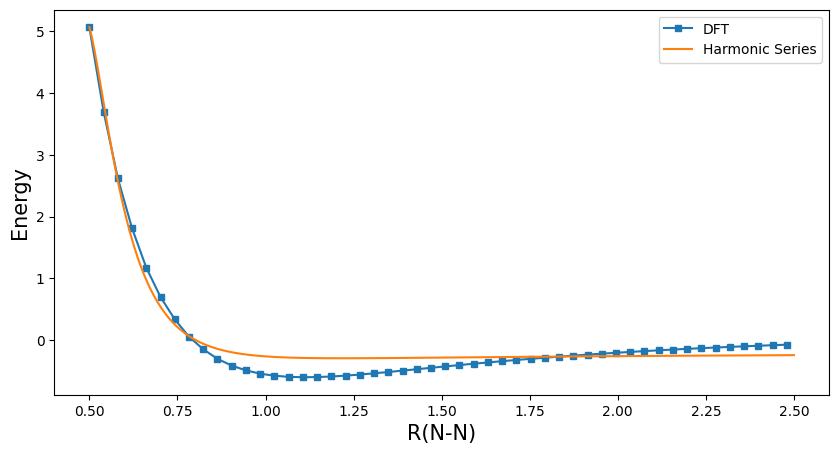

In [11]:
# Plotting
plt.figure(figsize=(10,5))
plt.plot(X.numpy()[::2], y.numpy()[::2], marker='s', markersize=5, label='DFT')

X_grid = torch.linspace(X.min(), X.max(), 2000)
X_grid = X_grid.unsqueeze(-1)
plt.plot(X_grid.detach().numpy(), model(X_grid).detach().numpy(), label='Harmonic Series')
plt.xlabel('R(N-N)', fontsize=15)
plt.ylabel('Energy', fontsize=15)
plt.legend()
plt.show()

## **Next Week**
The Non-Linear Model: $f(\mathbf{x}) = \mathbf{w}^\top \phi(\mathbf{x},\mathbf{w}') = \sum_i w_i \phi_i(\mathbf{x},\mathbf{w}')$.

> Optimizing the non-linear parameters $\mathbf{w}'$.

<img src="https://raw.github.com/RodrigoAVargasHdz/CHEM-4PB3/master/Course_Notes/Figures/nonLinear_model_diagram.png"  width="350" height="300">